# Óscar Gómez Borzdynski
## Práctica 2
### Procesos Estocásticos

In [48]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b, li, ul {color: #5D8AA8;}
</style>

### Ejercicio 1

<b>En los apuntes hay el ejemplo del gambler’s ruin como cadena de Markov.  Hacer un gráfico del numero medio de jugadas que el jugador puede hacer antes de arruinarse en funcion del dinero inicial. En cada jugada se juega 1 Euro, y el juego es ecuo (el jugador tiene una probabilidad $\frac{1}{2}$ de ganar). Estimar media y varianza con 20 ejecuciones considerando un dinero inicial de $1, 2,\dots, 50$ Euros. Indicar media y varianza. ¿Como varian la media y la varianza cuando aumenta el dinero inicial?</b>

Primero vamos a definir la cadena de markov para este problema concreto simplificando la codificación para que ejecute hasta que el jugador se arruine.

In [56]:
def run_gambler(initial_money, win_probability=0.5):
    money = initial_money
    games = 0
    while money > 0:
        if uniform(0,1) > win_probability:
            money += 1
        else: 
            money -= 1
        games += 1
    return games

In [80]:
max_money = 50
runs = 20

means = np.zeros(max_money)
variances = np.zeros(max_money)

for money in range(1, max_money + 1):
    actual_run = np.zeros(runs)
    for i in range(runs):
        actual_run[i] = run_gambler(money)
    means[money-1] = actual_run.mean()
    variances[money-1] = actual_run.var()

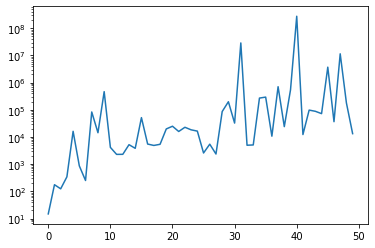

In [81]:
plt.plot(means)
plt.yscale('log')

<b>Indicar cuales de las siguientes matrices, si usadas como dinamica de un sistema a tiempodiscreto son: </b>

* Estable (todos los autovalores $\lambda$ tienen $|\lambda|<1$)
* Inestable (hay por lo menos un autovalor $\lambda$ con $|\lambda|>1$)
* Marginal (hay por lo menos un autovalor $\lambda$ con $|\lambda|=1$ y los demas tienen $|\lambda|<1$)
* Oscilantes (hay por lo menos un autovalor $\lambda$ con $|\lambda|=-1$ y los demas tienen $|\lambda|<1$)

<b>Indicar los autovalores y los autovectores correspondientes a las componentes estables, inestables, marginales y oscilantes</b>

In [76]:
A = np.array([[0.175, 0.125, 0.725, -0.225],
              [0.125, 0.175, -0.225, 0.725],
              [0.725, -0.225, 0.175, 0.125],
              [-0.225, 0.725, 0.125, 0.175]])
np.linalg.eig(A)

(array([-0.9, -0.2,  1. ,  0.8]),
 array([[-0.5,  0.5,  0.5,  0.5],
        [ 0.5,  0.5, -0.5,  0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

Podemos ver que la matriz A es marginal, es decir, tiene un autovalor $\lambda = 1$ con autovector asociado $(0.5, -0.5, 0.5, -0.5)$. Los demás autovalores tienen módulo menor que 1 y por tanto son parte de una componente estable.

In [77]:
B = np.array([[0.30, -0.30, 0.95, -0.45],
              [-0.30, 0.30, -0.45, 0.95],
              [0.95, -0.45, 0.30, -0.30],
              [-0.45, 0.95, -0.30, 0.30]])
np.linalg.eig(B)

(array([ 2. ,  0.5, -0.8, -0.5]),
 array([[ 0.5, -0.5, -0.5, -0.5],
        [-0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

La matriz B es inestable ya que presenta un autovalor $\lambda = 2$ con autovector asociado $(0.5, -0.5, 0.5 ,-0.5)$. El resto de autovalores tienen módulo menor que 1 y por tanto forman una componente estable.

In [78]:
C = np.array([[0.05, -0.05, 0.70, -0.20],
              [-0.05, 0.05, -0.20, 0.70],
              [0.70, -0.20, 0.05, -0.05],
              [-0.20, 0.70, -0.05, 0.05]])
np.linalg.eig(C)

(array([ 1. ,  0.5, -0.8, -0.5]),
 array([[ 0.5, -0.5, -0.5, -0.5],
        [-0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

La matriz C es marginal, es decir, tiene un autovalor $\lambda = 1$ con autovector asociado $(0.5, -0.5, 0.5, -0.5)$. Los demás autovalores tienen módulo menor que 1 y por tanto son parte de una componente estable.

In [79]:
D = np.array([[-0.125, -0.125, 0.775, -0.025],
              [-0.125, -0.125, -0.025, 0.775],
              [0.775, -0.025, -0.125, -0.125],
              [-0.025, 0.775, -0.125, -0.125]])
np.linalg.eig(D)

(array([ 0.8,  0.5, -1. , -0.8]),
 array([[ 0.5, -0.5, -0.5,  0.5],
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5,  0.5, -0.5],
        [-0.5, -0.5,  0.5,  0.5]]))

La matriz D es oscilante por presentar un autovalor $\lambda = -1$ con autovector asociado $(-0.5, -0.5, 0.5, 0.5)$. El resto de autovalores tienen módulo menor que 1 y por tanto corresponden con una componente estable. 